Accuracy: 60.00%
Confusion Matrix:
[[1 1]
 [1 2]]


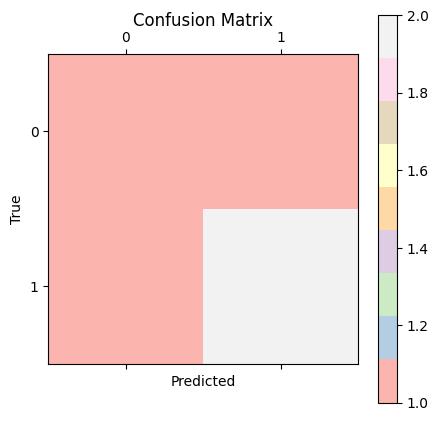

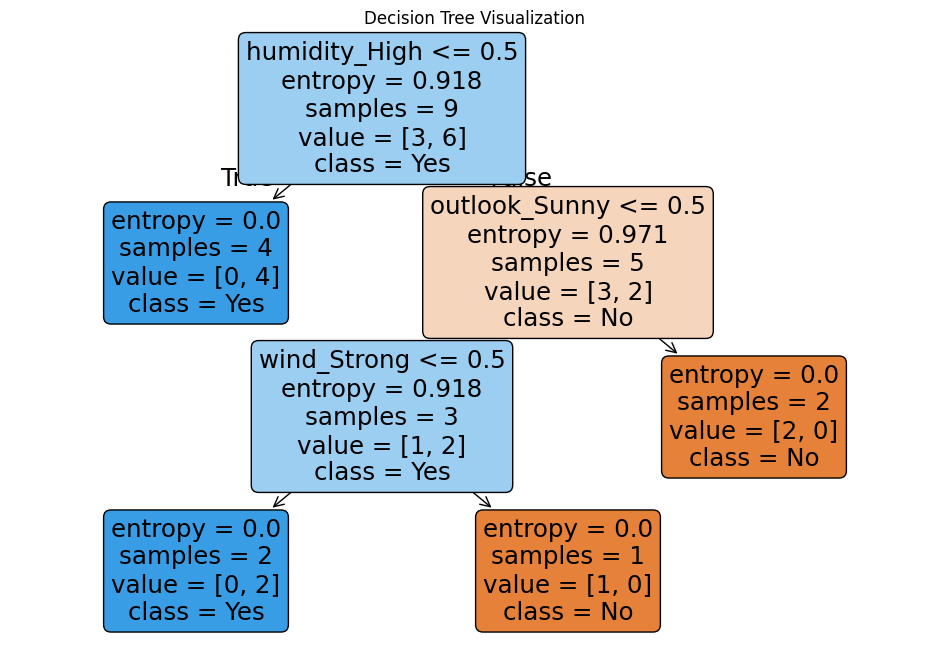

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('play_tennis.csv')

# Step 1: Data Preprocessing
# Drop 'day' column as it is irrelevant
df_cleaned = df.drop(columns=['day'])

# Encode the target variable 'play'
label_encoder = LabelEncoder()
df_cleaned['play'] = label_encoder.fit_transform(df_cleaned['play'])  # 'No' -> 0, 'Yes' -> 1

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=['outlook', 'temp', 'humidity', 'wind'])

# Step 2: Train-Test Split
X = df_encoded.drop(columns=['play'])  # Features
y = df_encoded['play']                # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Model Training
# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train, y_train)

# Step 4: Predict on test set
y_pred = dt_classifier.predict(X_test)

# Step 5: Model Evaluation
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
plt.matshow(conf_matrix, cmap='Pastel1', fignum=1)
plt.title('Confusion Matrix', pad=20)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()

# Step 6: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()
